# Tutorial: K-Means clustering on a Riemannian Manifold

In this notebook, we demonstrate how run a K-mean clustering algorithm on a Riemannian Manifold. Generate data on a sphere from a Von Mises Fisher distribution and apply a rotation sampled randomly from SO3.

## Setup

In [3]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'], 
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /home/emaignan/Documents/Thèse/Geomstats/geomstats


In [6]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.backend as gs
from geomstats.visualization import Sphere
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

np.random.seed(1)
gs.random.seed(1000)

INFO: Using numpy backend


## Data init: Generate clusters randomly on the sphere

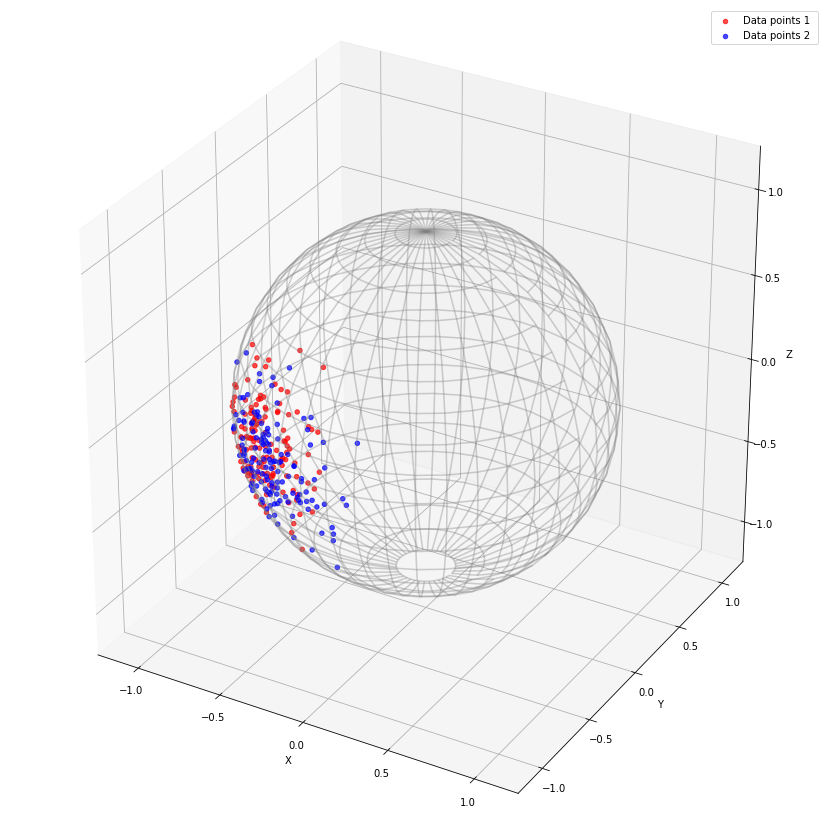

In [8]:
s2 = Hypersphere(dim=2)
cluster = s2.random_von_mises_fisher(kappa=20, n_samples=140)

SO3 = SpecialOrthogonal(3)
rotation1 = SO3.random_uniform()
rotation2 = SO3.random_uniform()

cluster_1 =  cluster @ rotation1
cluster_2 =  cluster @ rotation2

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection= '3d')
sphere = Sphere()
sphere.plot(cluster_1, space='S2', color='red', alpha=0.7, label='Data points 1 ')
sphere.plot(cluster_2, space='S2', ax = ax, color='blue', alpha=0.7, label='Data points 2')
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend();

## Operate Riemannian K-Means clustering 

In [9]:
from geomstats.learning.kmeans import RiemannianKMeans
from geomstats.geometry.hypersphere import Hypersphere

manifold = Hypersphere(dim=2)
metric = manifold.metric

data = gs.concatenate((cluster_1, cluster_2), axis=0)

kmeans = RiemannianKMeans(metric, 2, tol=1e-3, lr=1.)
kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.centroids

Plot the results:

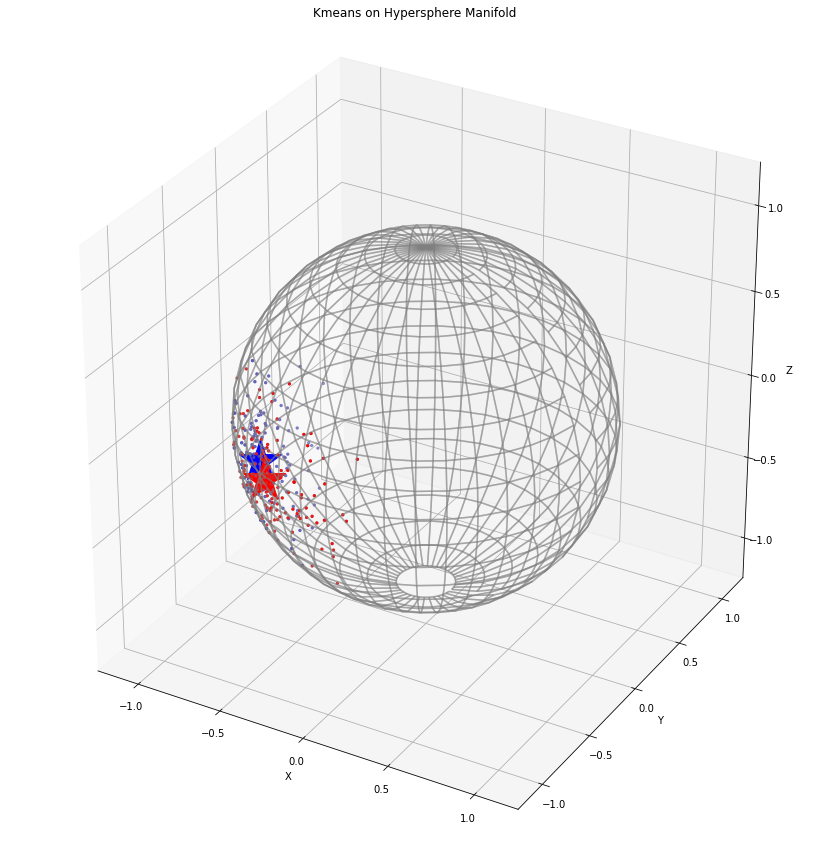

In [13]:
fig = plt.figure(figsize=(15, 15))
colors = ['red', 'blue']
ax = fig.add_subplot(111, projection='3d')

sphere.plot(
    data,
    space='S2',
    marker='.',
    color='grey')

for i in range(2):
    sphere.plot(
        points=data[labels == i],
        ax=ax,
        space='S2',
        marker='.',
        color=colors[i])

for i, c in enumerate(centroids):
    sphere.plot(
        gs.array([c]),
        ax=ax,
        space='S2',
        marker='*',
        s=2000,
        color=colors[i])

ax.set_title('Kmeans on Hypersphere Manifold');
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])